No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles wi


    \begin{table}
    \fontsize{6}{7.2}\selectfont
    \centering
    \caption{This is a table with scientific results.}
    \medskip
    \begin{tabular}{p{.06\textwidth}p{.105\textwidth}p{.08\textwidth}p{.105\textwidth}p{.08\textwidth}p{.105\textwidth}p{.08\textwidth}p{.105\textwidth}p{.08\textwidth}}
    \hline
    & \multicolumn{2}{l}{AS19}& \multicolumn{2}{l}{Flow Calib.}& \multicolumn{2}{l}{Mass Calib.}& \multicolumn{2}{l}{Flow+Mass Calib.} \\ 
\cline{2-9} \\ 
 & 50th [5th, 95th] & [16th, 84th] & 50th [5th, 95th] & [16th, 84th] & 50th [5th, 95th] & [16th, 84th] & 50th [5th, 95th] & [16th, 84th]  \\ 
& percentiles & percentiles & percentiles & percentiles & percentiles & percentiles & percentiles & percentiles  \\ 
& (cm SLE) & (cm SLE) & (cm SLE) & (cm SLE) & (cm SLE) & (cm SLE) & (cm SLE) & (cm SLE)  \\ 
\hline 
RCP 2.6 & 11 [2, 25] & [6, 19 ]& 8 [2, 18] & [4, 14 ]& 9 [4, 14] & [6, 13 ]& 8 [4, 14] & [5, 12 ] \\ 
RCP 4.5 & 15 [4, 30] & [8, 23 ]& 11 [3, 24] & [6, 18 ]& 12 [5, 19] 

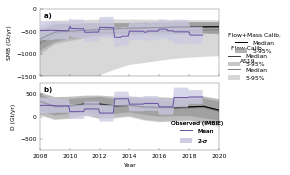

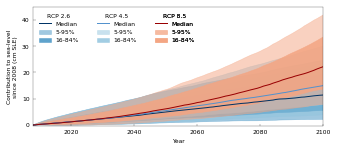

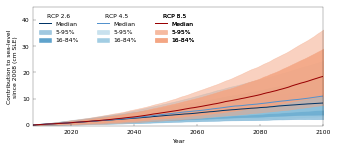

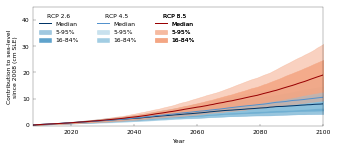

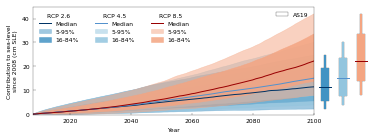

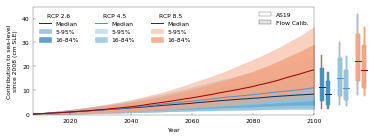

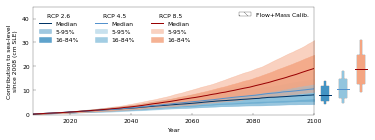

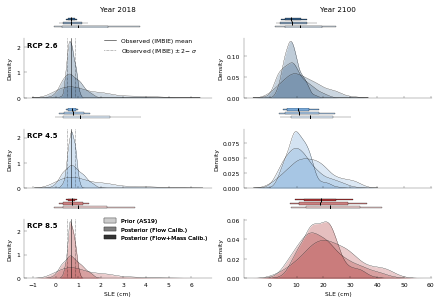

In [128]:
run calibrate-as19.py      

In [123]:
!open historical_partitioning.pdf


In [113]:
Line2D?

In [4]:
observed

,Year,Mass (Gt),Mass uncertainty (Gt),Cumulative surface mass balance anomaly (Gt),Cumulative surface mass balance anomaly uncertainty (Gt),Cumulative ice dynamics anomaly (Gt),Cumulative ice dynamics anomaly uncertainty (Gt),SMB (Gt/yr),D (Gt/yr),SMB uncertainty (Gt/yr),D uncertainty (Gt/yr),SLE (cm),SLE uncertainty (cm)
0,1980.000000,NaN,NaN,546.145087,22.721583,NaN,NaN,405.472691,NaN,78.709874,NaN,NaN,NaN
1,1980.083333,NaN,NaN,547.201145,32.133171,NaN,NaN,405.472691,NaN,78.709874,NaN,NaN,NaN
2,1980.166667,NaN,NaN,548.257202,39.354937,NaN,NaN,405.472691,NaN,78.709874,NaN,NaN,NaN
3,1980.250000,NaN,NaN,549.313260,45.443167,NaN,NaN,405.472691,NaN,78.709874,NaN,NaN,NaN
4,1980.333333,NaN,NaN,550.369317,50.807005,NaN,NaN,405.472691,NaN,78.709874,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,2018.583333,-2511.583239,344.868007,-1416.362846,501.907312,-1095.220393,547.081162,438.453071,-582.253071,77.031700,95.70853,0.692851,0.095136
464,2018.666667,-2523.566573,345.257579,-1412.558423,502.399682,-1111.008149,547.778369,438.453071,-582.253071,77.031700,95.70853,0.696156,0.095243
465,2018.750000,-2535.549906,345.646711,-1408.754001,502.891569,-1126.795905,548.474689,438.453071,-582.253071,77.031700,95.70853,0.699462,0.095351
466,2018.833333,-2547.533239,346.035406,-1404.949578,503.382976,-1142.583661,549.170127,438.453071,-582.253071,77.031700,95.70853,0.702768,0.095458


In [109]:

def plot_posterior_sle_pdfs(
    out_filename,
    df,
    observed=None,
    years=[2018, 2100],
):

    ensembles = ["AS19", "Flow Calib.", "Flow+Mass Calib."]
    alphas = [0.8, 0.9, 1.0]

    fig, axs = plt.subplots(
        6,
        2,
        sharex="col",
        figsize=[6.2, 4.2],
        gridspec_kw=dict(height_ratios=[0.75, 4] * 3),
    )
    fig.subplots_adjust(hspace=0.0, wspace=-0.0)
    for k, rcp in enumerate(rcps):
        for y, year in enumerate(years):
            y_df = df[df["Year"] == year]
            q_df = make_quantile_df(y_df, quantiles=[0.05, 0.16, 0.5, 0.84, 0.95])

            m_df = y_df[y_df["RCP"] == rcp]
            p_df = q_df[q_df["RCP"] == rcp]

            sns.kdeplot(
                data=m_df,
                x="SLE (cm)",
                hue="Ensemble",
                hue_order=ensembles,
                common_norm=False,
                common_grid=True,
                multiple="layer",
                fill=True,
                lw=0,
                palette=[color_tint(rcp_col_dict[rcp], alpha) for alpha in alphas],
                ax=axs[k * 2 + 1, y],
            )

            sns.kdeplot(
                data=m_df,
                x="SLE (cm)",
                hue="Ensemble",
                hue_order=ensembles,
                common_norm=False,
                common_grid=True,
                multiple="layer",
                fill=False,
                lw=0.25,
                palette=["k"] * len(ensembles),
                ax=axs[k * 2 + 1, y],
            )

            for e, ens in enumerate(ensembles):
                s_df = p_df[p_df["Ensemble"] == ens]
                mk_df = y_df[y_df["Ensemble"] == ens]

                alpha = alphas[e] - 0.2 * (len(ensembles) - e)
                m_color = color_tint(rcp_col_dict[rcp], alpha)
                lw = 0.25


                axs[(k*2), y].vlines(s_df[[0.5]].values[0][0], e, e+1, colors="k", lw=1)

                rect1 = plt.Rectangle(
                    (s_df[[0.05]].values[0][0], e + 0.4),
                    s_df[[0.95]].values[0][0] - s_df[[0.05]].values[0][0],
                    0.2,
                    color=m_color,
                    alpha=1,
                    lw=0,
                )
                rect2 = plt.Rectangle(
                    (s_df[[0.16]].values[0][0], e + 0.2),
                    s_df[[0.84]].values[0][0] - s_df[[0.16]].values[0][0],
                    0.6,
                    color=m_color,
                    alpha=1,
                    lw=0,
                )
                rect3 = plt.Rectangle(
                    (s_df[[0.05]].values[0][0], e + 0.4),
                    s_df[[0.95]].values[0][0] - s_df[[0.05]].values[0][0],
                    0.2,
                    color="k",
                    alpha=1,
                    fill=False,
                    lw=lw,
                )
                rect4 = plt.Rectangle(
                    (s_df[[0.16]].values[0][0], e + 0.2),
                    s_df[[0.84]].values[0][0] - s_df[[0.16]].values[0][0],
                    0.6,
                    color="k",
                    alpha=1,
                    fill=False,
                    lw=lw,
                )

                axs[(k * 2), y].add_patch(rect1)
                axs[(k * 2), y].add_patch(rect3)
                axs[(k * 2), y].add_patch(rect2)
                axs[(k * 2), y].add_patch(rect4)
                # axs[(k * 2), y].add_patch(rect0)

                axs[(k * 2), y].set_ylabel(None)
                axs[(k * 2), y].axes.xaxis.set_visible(False)
                axs[(k * 2), y].axes.yaxis.set_visible(False)
                sns.despine(ax=axs[(k * 2), y], left=True, bottom=True)
                sns.despine(ax=axs[(k * 2) + 1, y], top=True)

                axs[(k * 2), y].set_ylim(0, len(ensembles))
                
                axs[k,y ].legend().remove()
                axs[k * 2 + 1,y].legend().remove()

                axs[0, y].set_title(f"Year {year}")



        if observed is not None:
            obs = observed[(observed["Year"] >= years[0]) & (observed["Year"] < years[0] + 1)]
            obs_mean = obs["SLE (cm)"].mean()
            obs_std = obs["SLE uncertainty (cm)"].mean()
            axs[(k * 2) + 1, 0].axvline(obs_mean, c="k", lw=0.5)
            axs[(k * 2) + 1, 0].axvline(obs_mean - 2 * obs_std, c="k", lw=0.5, ls="dotted")
            axs[(k * 2) + 1, 0].axvline(obs_mean + 2 * obs_std, c="k", lw=0.5, ls="dotted")


    for k, rcp in enumerate(rcps):
        add_inner_title(axs[k * 2 + 1,0], rcp_dict[rcp])


    l_as19 = Patch(
        facecolor=str(alphas[2] - 0.2 * (len(ensembles) - 2)), edgecolor="0.0", linewidth=0.25, label="Prior (AS19)"
    )
    l_mass = Patch(
        facecolor=str(alphas[1] - 0.2 * (len(ensembles) - 1)),
        edgecolor="0.0",
        linewidth=0.25,
        label="Posterior (Flow Calib.)",
    )
    l_calib = Patch(
        facecolor=str(alphas[0] - 0.2 * (len(ensembles) - 0)),
        edgecolor="0.0",
        linewidth=0.25,
        label="Posterior (Flow+Mass Calib.)",
    )

    legend_1 = axs[-1, 0].legend(
        handles=[l_as19, l_mass, l_calib],
        loc="upper left",
        bbox_to_anchor=(0.4, 1.1, 0, 0),
    )
    legend_1.get_frame().set_linewidth(0.0)
    legend_1.get_frame().set_alpha(0.0)
    axs[-1, 0].add_artist(legend_1)

    fig.tight_layout()
    fig.savefig(out_filename)



No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles wi

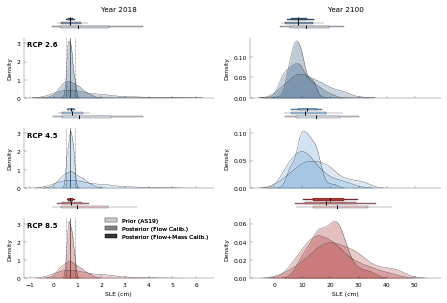

In [110]:

plot_posterior_sle_pdfs(f"sle_pdf_2018_2100.pdf", all_df, observed=observed)


In [60]:
!open sle_pdf_2018_2100.pdf

In [40]:
!open sle_pdf_2018.0.pdf

In [86]:
plt.vlines?

In [53]:
np.linspace(0, 292, 293)

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15